In [2]:
library(tidyverse)
library(stargazer)
library(olsrr)
library(readr)
library(readxl)
library(dplyr)
library(broom)
library(car)
library(lmtest)
library(corpcor)
library(sandwich)
library(fastDummies)
library(plm)
library(forecast)

options(scipen=10)

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0     v purrr   1.0.0
v tibble  3.2.1     v dplyr   1.1.1
v tidyr   1.2.1     v stringr 1.5.0
v readr   2.1.3     v forcats 0.5.2
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 



Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode


The following object is masked from 'package:purrr':

    some


Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.n

# IN VMT and Income Data

In [42]:
nhts = read.csv('data/vehpub.csv')
nhts = nhts[c('HHSTATE','HHFAMINC','BESTMILE')]

In [43]:
nhts.in = nhts[nhts$HHSTATE=='IN',]


In [47]:
incmile = aggregate(BESTMILE ~ HHFAMINC,data=nhts.in,mean)
incmile

HHFAMINC,BESTMILE
<int>,<dbl>
-9,14999.958
-8,8692.928
-7,8015.571
1,7073.292
2,7580.397
3,9013.537
4,9192.938
5,9153.338
6,9815.247


In [51]:
incmile$Bracket = c('Not Ascertained','I Dont Know','I prefer not to answer','Less than $10,000','$10,000-$14,999','$15,000-$24,999','$25,000-$34,999','$35,000-$49,999','$50,000-$74,999','$75,000-$99,999','$100,000-$124,999','$125,000-$149,999','$150,000-$199,999','$200,000 or more')
incmile = incmile[c('HHFAMINC','Bracket','BESTMILE')][4:14,]

,HHFAMINC,Bracket,BESTMILE
,<int>,<chr>,<dbl>
4,1,"Less than $10,000",7073.292
5,2,"$10,000-$14,999",7580.397
6,3,"$15,000-$24,999",9013.537
7,4,"$25,000-$34,999",9192.938
8,5,"$35,000-$49,999",9153.338
9,6,"$50,000-$74,999",9815.247
10,7,"$75,000-$99,999",10099.842
11,8,"$100,000-$124,999",11268.174
12,9,"$125,000-$149,999",10594.203


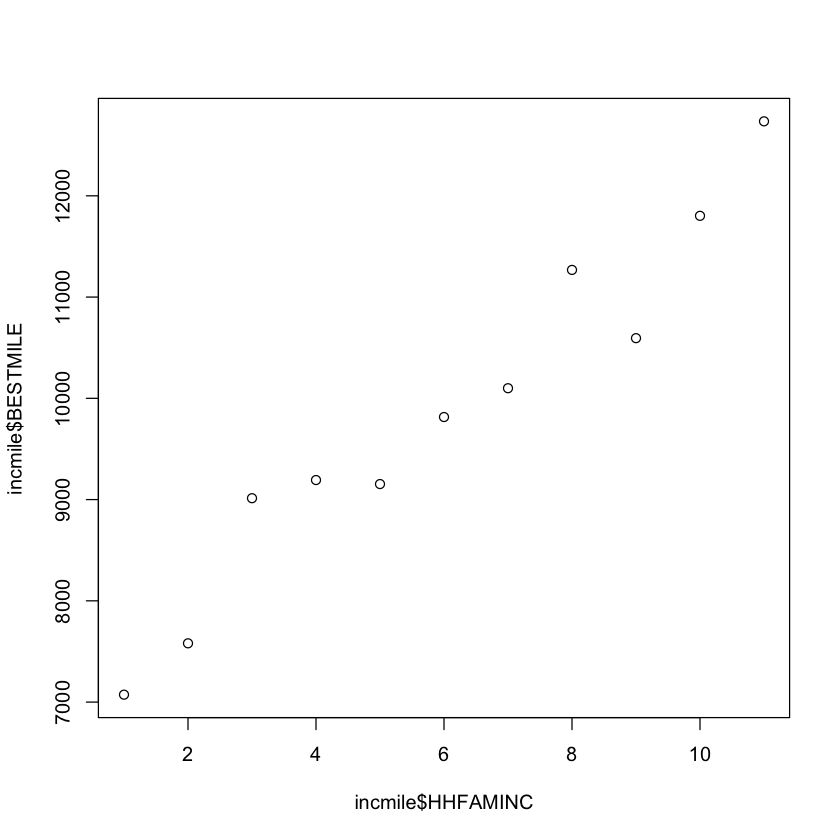

In [52]:
plot(incmile$HHFAMINC,incmile$BESTMILE)